### MUINBDES_TFM_CALIDAD_AIRE_MADRID
>Autor: *Adrián Aguado*
>
>Fecha: *Julio 2019*
>
>Descripción: *Preprocesado y formateado datos calidad aire + estaciones*
>
>Nombre fichero: **merge_data_calidad_aire**
>
>Fuente datos: https://datos.madrid.es

In [4]:
# Load libraries
import pandas

In [6]:
# Read data
df_estaciones = pandas.read_csv('../air_quality_stations/formatted_data/calidad_aire_estaciones_formatted')
df_calidad = pandas.read_csv('formatted_data/contaminación_2018.csv')

In [7]:
# Rename columns
df_estaciones.rename(columns={'estacion':'descripcion'}, inplace=True)
df_estaciones.rename(columns={'numero':'estacion'}, inplace=True)
#df_estaciones.head(3)
#df_calidad.head(5)

,estacion,descripcion,direccion,longitud,latitud,altitud,tipo de estacion,no2,so2,co,...,dv,tmp,hr,prb,rs,ll,latitud.1,longitud.1,coordinates,zona
0,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,1,1,1,...,1,1,1,0,0,1,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225",interior M30
1,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3º 40' 56,35''O","40º 25' 17,63''N",670.0,UT,1,1,1,...,0,0,0,0,0,0,40.421564,-3.682319,"40.42156388888888,-3.6823194444444445",interior M30
2,11,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3º 40' 38,48''O","40º 27' 05,31''N",708.0,UT,1,0,0,...,0,0,0,0,0,1,40.451475,-3.677356,"40.451475,-3.6773555555555553",interior M30


In [139]:
# Merge data into a data frame
dfm = pandas.merge(df_calidad, df_estaciones[['estacion',
                                       'descripcion',
                                       'altitud',
                                       'latitud_new',
                                       'longitud_new',
                                       'coordinates']],
             on='estacion',
             how='left').rename(columns={'latitud_new':'latitud',
                                         'longitud_new':'longitud'})
dfm.head()

,estacion,no2,timestamp,descripcion,altitud,latitud,longitud,coordinates
0,4,21.0,2018-04-01 00:00:00,Pza. de España,635.0,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225"
1,4,19.0,2018-04-01 01:00:00,Pza. de España,635.0,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225"
2,4,17.0,2018-04-01 02:00:00,Pza. de España,635.0,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225"
3,4,24.0,2018-04-01 03:00:00,Pza. de España,635.0,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225"
4,4,17.0,2018-04-01 04:00:00,Pza. de España,635.0,40.423853,-3.712247,"40.423852777777775,-3.7122472222222225"


In [140]:
# Sort values
dfm.sort_values(by=['timestamp','estacion','no2'], inplace=True)

In [141]:
# Select especific columns to visualize
dfm = dfm[['timestamp',
           'estacion',
           'descripcion',
           'latitud',
           'longitud',
           'altitud',
           'coordinates',
          'no2']]
dfm.head()

,timestamp,estacion,descripcion,latitud,longitud,altitud,coordinates,no2
35040,2018-01-01 00:00:00,4,Pza. de España,40.423853,-3.712247,635.0,"40.423852777777775,-3.7122472222222225",15.0
35784,2018-01-01 00:00:00,8,Escuelas Aguirre,40.421564,-3.682319,670.0,"40.42156388888888,-3.6823194444444445",33.0
36528,2018-01-01 00:00:00,11,Avda. Ramón y Cajal,40.451475,-3.677356,708.0,"40.451475,-3.6773555555555553",11.0
37272,2018-01-01 00:00:00,16,Arturo Soria,40.440047,-3.639233,693.0,"40.44004722222222,-3.6392333333333333",12.0
38016,2018-01-01 00:00:00,17,Villaverde,40.347139,-3.713322,604.0,"40.34713888888889,-3.713322222222222",23.0


In [142]:
# Tranform data to time values
dfm['timestamp'] = pandas.to_datetime(dfm.timestamp)
dfm['hour'] = dfm.timestamp.dt.hour
dfm['date'] = dfm.timestamp.dt.date
dfm['month'] = dfm.timestamp.dt.month_name()
dfm['week_day'] = dfm.timestamp.dt.weekday_name

### Escenarios de contaminación (por zonas)

- 1 (interior M-30): 7 de tráfico (Escuelas Aguirre, Castellana, Plaza de Castilla, Ramón y Cajal, Cuatro Caminos, Plaza de España y Barrio del Pilar) + 3 de fondo (Plaza del Carmen, Méndez Álvaro y Retiro)
- 2 (sureste): 1 de tráfico (Moratalaz) + 2 de fondo (Vallecas y Ensanche de Vallecas)
- 3 (noreste): 5 de fondo (Arturo Soria, Sanchinarro, Urbanización Embajada, Barajas pueblo y Tres Olivos) + 1 suburbana (Juan Carlos I)
- 4 (noroeste): 2 suburbanas (El Pardo y Casa de Campo)
- 5 (suroeste): 1 de tráfico (Fernández Ladreda) + 2 de fondo (Farolillo y Villaverde)

In [143]:
# Read data
dfm = pandas.read_csv('formatted_data/calidad_aire_2018_formatted.csv')
dfm['timestamp'] = pandas.to_datetime(dfm.timestamp)

In [144]:
# Establish regions
zonas = ['interior M30', 'sureste', 'noreste', 'noroeste', 'suroeste']
mapper_zonas = {'Escuelas Aguirre':1,
                'Castellana':1,
                'Plaza Castilla':1,
                'Avda. Ramón y Cajal':1,
                'Cuatro Caminos':1,
                'Pza. de España':1,
                'Barrio del Pilar':1,
                
                'Pza. del Carmen':1,
                'Mendez Alvaro':1,
                'Parque del Retiro':1,
                
                'Moratalaz':2,
                'Vallecas':2,
                'Ensanche de Vallecas':2,
                
                'Arturo Soria':3,
                'Sanchinarro':3,
                'Urb. Embajada':3,
                'Barajas Pueblo':3,
                'Tres Olivos':3,
                'Juan Carlos I':3,
                
                'El Pardo':4,
                'Casa de Campo':4,
                
                'Pza. Fernández Ladreda':5,
                'Farolillo':5,
                'Villaverde':5,
               }

In [145]:
# Establish regions per control_stations
dfm['zona'] = ''
for d in dfm.descripcion.unique():
    dfm.loc[dfm.descripcion == d,'zona'] = zonas[mapper_zonas[d]-1]

In [146]:
dfm.head()

,timestamp,estacion,descripcion,latitud,longitud,altitud,coordinates,no2,hour,date,month,week_day,zona
0,2018-01-01,4,Pza. de España,40.423853,-3.712247,635.0,"40.423852777777775,-3.7122472222222225",15.0,0,2018-01-01,January,Monday,interior M30
1,2018-01-01,8,Escuelas Aguirre,40.421564,-3.682319,670.0,"40.42156388888888,-3.6823194444444445",33.0,0,2018-01-01,January,Monday,interior M30
2,2018-01-01,11,Avda. Ramón y Cajal,40.451475,-3.677356,708.0,"40.451475,-3.6773555555555553",11.0,0,2018-01-01,January,Monday,interior M30
3,2018-01-01,16,Arturo Soria,40.440047,-3.639233,693.0,"40.44004722222222,-3.6392333333333333",12.0,0,2018-01-01,January,Monday,noreste
4,2018-01-01,17,Villaverde,40.347139,-3.713322,604.0,"40.34713888888889,-3.713322222222222",23.0,0,2018-01-01,January,Monday,suroeste


### PREAVISO

Cuando dos estaciones cualesquiera de una misma zona superan, simultáneamente, 180 μg/m3 durante dos horas consecutivas, o tres estaciones cualesquiera de la red de vigilancia superan, simultáneamente, 180 μg/m3 durante tres horas consecutivas.

In [ ]:
# Establish column for regions with more than 180 (1 time)
dfm['supera_180'] = 0
dfm.loc[dfm.no2 >= 180,'supera_180'] = 1
#dfm.head()

In [148]:
dfm.to_csv('contaminacion_2018.csv', index=False)

In [ ]:
# Establish column for regions with more than 180 (2 times or more)
df2 = dfm[['timestamp','supera_180','zona']].groupby(['timestamp','zona']).sum().reset_index()
df2 = df2.set_index('timestamp')
df2['supera_180_2_o_mas'] = 0
df2.loc[df2.supera_180>1, 'supera_180_2_o_mas'] = 1
#df2.head()

In [113]:
%matplotlib inline

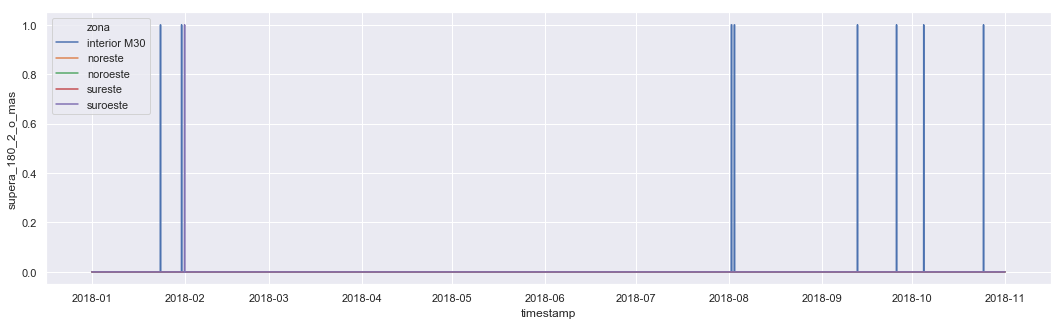

In [114]:
import seaborn
seaborn.set(rc={'figure.figsize':(18,5)})
ax = seaborn.lineplot(x=df2.index, y="supera_180_2_o_mas",hue='zona', data=df2)

In [133]:
alldf = list()
for z in df2.zona.unique():
    dfx = df2[['supera_180_2_o_mas','zona']][df2.zona==z].resample('2H', label='right').sum().reset_index()
    dfx['zona'] = z
    alldf.append(dfx)

df3 = pandas.concat(alldf)
df3.set_index('timestamp', inplace=True)
df3['consecutivas2'] = 0
df3.loc[df3.supera_180_2_o_mas > 1, 'consecutivas2'] = 1
df3[df3.consecutivas2 > 0]

,supera_180_2_o_mas,zona,consecutivas2
timestamp,,,
2018-01-23 22:00:00,2,interior M30,1
2018-08-02 00:00:00,2,interior M30,1
2018-08-03 00:00:00,2,interior M30,1


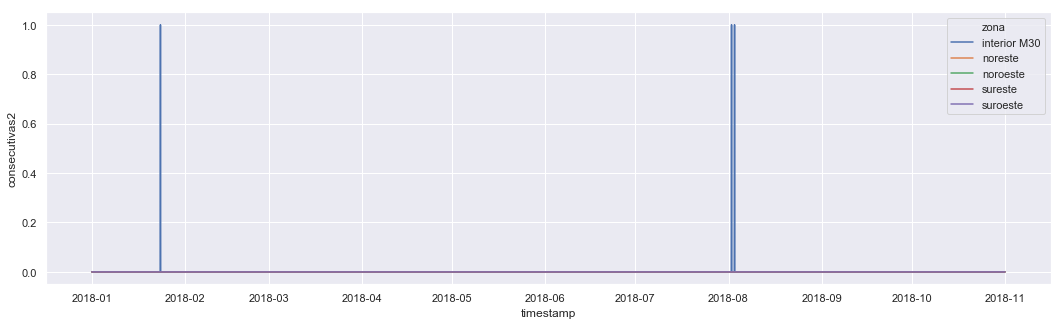

In [134]:
seaborn.set(rc={'figure.figsize':(18,5)})
ax = seaborn.lineplot(x=df3.index, y="consecutivas2",hue='zona', data=df3)

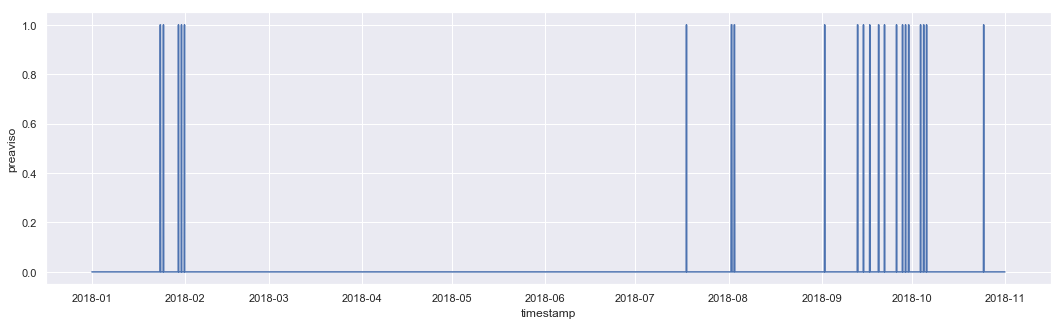

In [77]:
dfx['preaviso']=0
dfx.loc[dfx.supera_180>=2,'preaviso'] = 1
seaborn.set(rc={'figure.figsize':(18,5)})
ax = seaborn.lineplot(x=dfx.index, y="preaviso", data=dfx)

In [78]:
dfx.head()

,supera_180,preaviso
timestamp,,
2018-01-01 02:00:00,0,0
2018-01-01 04:00:00,0,0
2018-01-01 06:00:00,0,0
2018-01-01 08:00:00,0,0
2018-01-01 10:00:00,0,0
